# Question 1
- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
- Create at least one function and one lambda function.
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.  Open your CSV file, generate a log-log figure according to the data you saved.
- Write a conclusion at the end of your code base on your figure.

In [19]:
import nltk
import glob
filenames = sorted(glob.glob('/Users/karandutt/nltk_data/corpora/gutenberg/*.txt')) #sorted will return the txt files in ascending order
filenames = filenames[:] # return all txt file names in the user directory
for f in filenames: #loop and print each filename 
    print(f)

/Users/karandutt/nltk_data/corpora/gutenberg/austen-emma.txt
/Users/karandutt/nltk_data/corpora/gutenberg/austen-persuasion.txt
/Users/karandutt/nltk_data/corpora/gutenberg/austen-sense.txt
/Users/karandutt/nltk_data/corpora/gutenberg/bible-kjv.txt
/Users/karandutt/nltk_data/corpora/gutenberg/blake-poems.txt
/Users/karandutt/nltk_data/corpora/gutenberg/bryant-stories.txt
/Users/karandutt/nltk_data/corpora/gutenberg/burgess-busterbrown.txt
/Users/karandutt/nltk_data/corpora/gutenberg/carroll-alice.txt
/Users/karandutt/nltk_data/corpora/gutenberg/chesterton-ball.txt
/Users/karandutt/nltk_data/corpora/gutenberg/chesterton-brown.txt
/Users/karandutt/nltk_data/corpora/gutenberg/chesterton-thursday.txt
/Users/karandutt/nltk_data/corpora/gutenberg/edgeworth-parents.txt
/Users/karandutt/nltk_data/corpora/gutenberg/melville-moby_dick.txt
/Users/karandutt/nltk_data/corpora/gutenberg/milton-paradise.txt
/Users/karandutt/nltk_data/corpora/gutenberg/shakespeare-caesar.txt
/Users/karandutt/nltk_data

In [20]:
import math
import csv
import matplotlib.pyplot as plt #as plt is used everywhere so i used it

In [25]:
#reuters and find the length using glob.glob and len fn
from nltk.corpus import reuters
len(glob.glob('/Users/karandutt/nltk_data/corpora/reuters/training/100*'))

64

In [27]:
#gutenberg and find the length using glob.glob and len fn
from nltk.corpus import gutenberg
len(glob.glob('/Users/karandutt/nltk_data/corpora/gutenberg/*.txt'))

18

In [31]:
# reuters
words = [] # create an empty list
for name in glob.glob('/Users/karandutt/nltk_data/corpora/reuters/training/100*'): #loop
    [words.append(word.lower()) for word in reuters.words(name) if word.isalpha()]
print(words)    

['n', 'z', 'trading', 'bank', 'deposit', 'growth', 'rises', 'slightly', 'new', 'zealand', 's', 'trading', 'bank', 'seasonally', 'adjusted', 'deposit', 'growth', 'rose', 'pct', 'in', 'january', 'compared', 'with', 'a', 'rise', 'of', 'pct', 'in', 'december', 'the', 'reserve', 'bank', 'said', 'year', 'on', 'year', 'total', 'deposits', 'rose', 'pct', 'compared', 'with', 'a', 'pct', 'increase', 'in', 'the', 'december', 'year', 'and', 'pct', 'rise', 'a', 'year', 'ago', 'period', 'it', 'said', 'in', 'its', 'weekly', 'statistical', 'release', 'total', 'deposits', 'rose', 'to', 'billion', 'n', 'z', 'dlrs', 'in', 'january', 'compared', 'with', 'billion', 'in', 'december', 'and', 'billion', 'in', 'january', 'national', 'amusements', 'again', 'ups', 'viacom', 'lt', 'via', 'bid', 'viacom', 'international', 'inc', 'said', 'lt', 'national', 'amusements', 'inc', 'has', 'again', 'raised', 'the', 'value', 'of', 'its', 'offer', 'for', 'viacom', 's', 'publicly', 'held', 'stock', 'the', 'company', 'said', 

In [48]:
# for gutenberg
wordsgut =[]
for name in glob.glob('/Users/karandutt/nltk_data/corpora/gutenberg/*.txt'): 
    [words.append(word.lower()) for word in gutenberg.words(name) if word.isalpha()]
#print(words)    

In [38]:
# the problem asks for use of a function and use of lambda
def Wordcount(list =[]): #define a function wordcount with an argument of a list
    freqcnt= {}         # create an empty dictionary 
    for word in list:        # loop in the list
        freqcnt[word] = freqcnt.get(word,0) +1
    sortedlist = sorted(freqcnt.items(), key=lambda x: x[1])
    list = sorted(sortedlist,key=lambda x: x[1],reverse=True)
    return list #return the list

In [49]:
count=1
list = Wordcount(words)
with open('csvdatakaran.csv', 'w') as csvfile: #https://docs.python.org/3/library/csv.html
    writer = csv.writer(csvfile) # i could only figure this out after reading the documentation and stack overflow
    writer.writerow(['Word','Rank','Frequency'])
    for item in list:
        writer.writerow([item[0],count,item[1]]) 
        count+=1

In [51]:
x=[]
y=[]
with open('csvdatakaran.csv','r') as file: #open and read the file 
    reader= csv.reader(file) #use csv reader function 
    next(reader,None) #remove header from the csv file
    for row in reader: #loop 
        x.append(math.log10(int(row[1]))) #took help from stack overflow 
        y.append(math.log10(int(row[2]))) #took help from stack overflow
plt.plot(x,y)

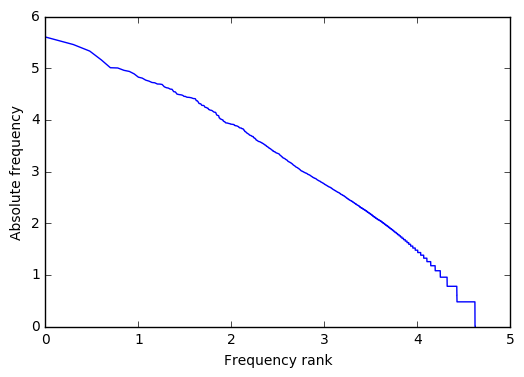

In [53]:
x=[] #create an empty list x for the 2D figure
y=[] #create an empty list y for the 2D figure
with open('csvdatakaran.csv','r') as file:
    reader = csv.reader(file) 
    next(reader,None) 
    for row in reader:
        x.append(math.log10(int(row[1])))
        y.append(math.log10(int(row[2])))
plt.plot(x,y) 
plt.xlabel("Frequency rank")            
plt.ylabel("Absolute frequency")
plt.show()

# Conclusion
- This approximately follows Zipfs law since the standard deviation is close to zero